#introduction to neural network with tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

##creating data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
np.random.seed(42)

X=np.arange(1.,20.,3)#features
y=np.arange(13.,33.,3)#labels
X, X.dtype, type(X), y, y.dtype, type(y)

(array([ 1.,  4.,  7., 10., 13., 16., 19.]),
 dtype('float64'),
 numpy.ndarray,
 array([13., 16., 19., 22., 25., 28., 31.]),
 dtype('float64'),
 numpy.ndarray)

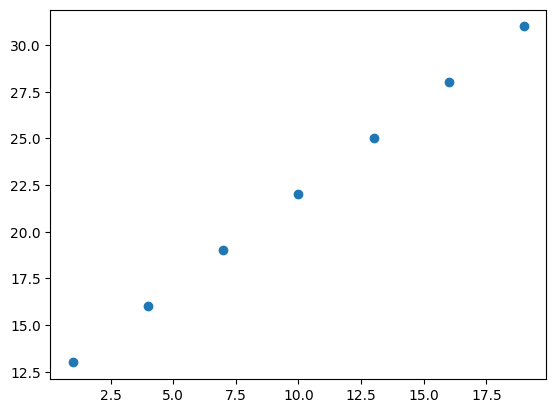

In [5]:
plt.scatter(X,y)

In [6]:
y==X+12 #relationship betwwen dependent variable and independent variable

array([ True,  True,  True,  True,  True,  True,  True])

##Input and Output shapes

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
#turn our numpy aray to tensors
X=tf.cast( tf.constant(X), dtype=tf.float32)
y=tf.cast(tf.constant(y), dtype=tf.float32)
X, X.dtype, y, y.dtype

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  4.,  7., 10., 13., 16., 19.], dtype=float32)>,
 tf.float32,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([13., 16., 19., 22., 25., 28., 31.], dtype=float32)>,
 tf.float32)

In [10]:
type(X), X.dtype

(tensorflow.python.framework.ops.EagerTensor, tf.float32)

In [11]:
X[0].shape

TensorShape([])

##steps in modeling with tensorflow

1. creating model- define input and output and hidden layers
2. compiling model- define loss function, optimizer, evaluation metrics
3. fitting model

In [12]:
np.random.seed(42)

#create a model using Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
'''
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
'''

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.mae])

#fitting the model
model.fit(X[:,tf.newaxis],y,epochs=5,verbose=1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step - loss: 26.0771 - mean_absolute_error: 26.0771
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 25.0671 - mean_absolute_error: 25.0671
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 24.0571 - mean_absolute_error: 24.0571
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 23.0471 - mean_absolute_error: 23.0471
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 22.0371 - mean_absolute_error: 22.0371


In [13]:
model

<Sequential name=sequential, built=True>

In [14]:
X[:,tf.newaxis]

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[ 1.],
       [ 4.],
       [ 7.],
       [10.],
       [13.],
       [16.],
       [19.]], dtype=float32)>

In [15]:
tf.squeeze(X[:,tf.newaxis])

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  4.,  7., 10., 13., 16., 19.], dtype=float32)>

In [16]:
tf.expand_dims(X,-1)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[ 1.],
       [ 4.],
       [ 7.],
       [10.],
       [13.],
       [16.],
       [19.]], dtype=float32)>

In [17]:
tf.squeeze(tf.expand_dims(X,-1))

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  4.,  7., 10., 13., 16., 19.], dtype=float32)>

In [18]:
X.dtype, y.dtype

(tf.float32, tf.float32)

In [19]:
X,y


(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  4.,  7., 10., 13., 16., 19.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([13., 16., 19., 22., 25., 28., 31.], dtype=float32)>)

In [20]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.1422893],
       [0.4191572],
       [0.6960251],
       [0.972893 ],
       [1.2497609],
       [1.5266287],
       [1.8034966]], dtype=float32)

In [21]:
model.predict(np.array([20.])) #far from 13

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[1.8957859]], dtype=float32)

In [22]:
model.predict(np.array([1.]))+5 #5 is mean absolute error, still far from 13

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[5.142289]], dtype=float32)

##improveour model

by altering the steps we took to create a model

>creating a model:
 * add more layers
 * increase neurons within each of the hidden layer
 * change the activation function of each layer

>compiling a model:
 * change the optimization function or learning rate

>fitting a model:
 * fit a model for more epochs or more data



In [23]:
tf.random.set_seed(42)
np.random.seed(42)

In [24]:


model=tf.keras.Sequential([
    #tf.keras.layers.Dense(100,activation='sigmoid'),
    #tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

model.fit(X[:,None],y,epochs=120)

Epoch 1/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 22.7137 - mae: 22.7137
Epoch 2/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 21.5424 - mae: 21.5424
Epoch 3/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.4228 - mae: 20.4228
Epoch 4/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 19.3418 - mae: 19.3418
Epoch 5/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 18.2751 - mae: 18.2751
Epoch 6/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.1974 - mae: 17.1974
Epoch 7/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.1029 - mae: 16.1029
Epoch 8/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.9873 - mae: 14.9873
Epoch 9/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.8467 - mae: 13.8467
Epoch 10/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.6789 - mae: 12.6789
Epoch 11/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.4843 - mae: 11.4843
Epoch 12/120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.2466 - mae: 10.2466
Epoch 13/120
1/1 ━━━━━━━━━━

In [25]:
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  4.,  7., 10., 13., 16., 19.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([13., 16., 19., 22., 25., 28., 31.], dtype=float32)>)

In [26]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[11.134886],
       [14.565814],
       [17.996742],
       [21.427671],
       [24.858599],
       [28.289528],
       [31.730146]], dtype=float32)

In [27]:
model.predict(np.array([20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[32.911884]], dtype=float32)

##Evaluating a model

In [28]:
#make a bigger dataset
X=tf.range(-100,100,2)
y=X+12
X,y

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
         -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
         -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
         -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
         -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
          10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
          32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
          54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
          76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
          98], dtype=int32)>,
 <tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66, -64,
        -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40, -38,
        -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -

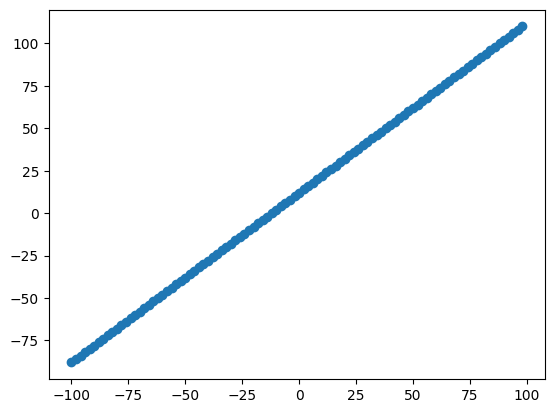

In [29]:
#visualize the data
plt.scatter(X,y)

In [30]:
#three sets: Trainig Set, Validation Set, Testing Set
len(X)

100

In [31]:
X_train=X[:80]
y_train=y[:80]
X_test=X[80:]
y_test=y[80:]

len(X_train), len(X_test)

(80, 20)

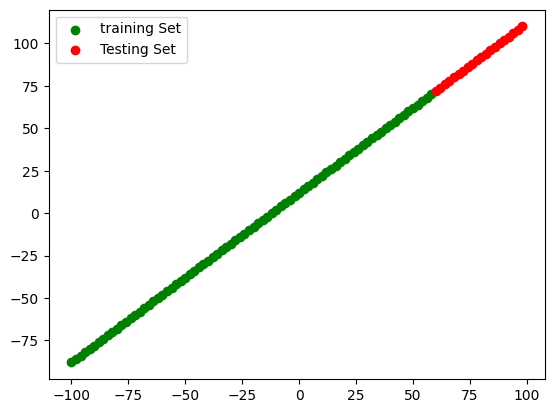

In [32]:
#visualizing the sets
plt.scatter(X_train,y_train,c='g',label='training Set')
plt.scatter(X_test,y_test,c='r',label='Testing Set')
plt.legend()

In [33]:
model=tf.keras.Sequential([
    #tf.keras.layers.Dense(1,name='input_layer'),
    tf.keras.layers.Dense(100,input_shape=[1], name='input_layer',activation='relu'),
    tf.keras.layers.Dense(1, name='output_layer')

])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
              metrics=[tf.keras.metrics.mae])

model.fit(X_train[:,tf.newaxis],y_train,epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 43.2684 - mean_absolute_error: 43.2684  
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.8444 - mean_absolute_error: 41.8444 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.4498 - mean_absolute_error: 40.4498 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0585 - mean_absolute_error: 39.0585 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.6538 - mean_absolute_error: 37.6538 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.2545 - mean_absolute_error: 36.2545 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.8604 - mean_absolute_error: 34.8604 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4608 - mean_absolute_error: 33.4608 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.0605 - mean_absolute_error: 32.0605 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.6539 - mean_absolute_error: 30.6539 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

In [35]:
from tensorflow.keras.utils import plot_model

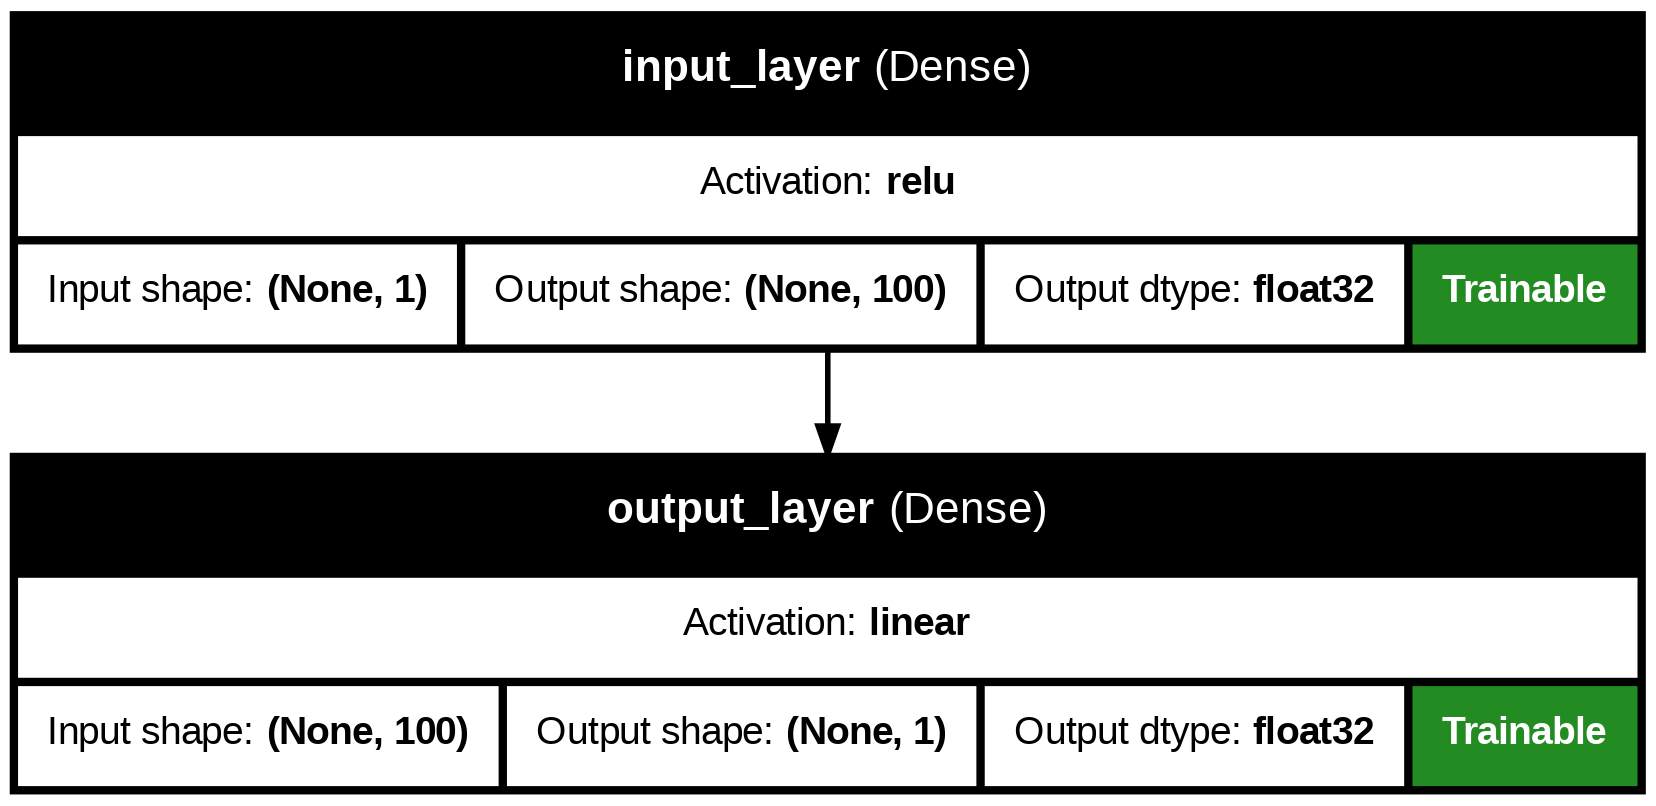

In [36]:
plot_model(model,show_shapes=True,show_layer_names=True,show_dtype=True,show_trainable=True,show_layer_activations=True)

##Visualizing the model's predictions

In [37]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [38]:
def plot_data(train_data=X_train, train_labels=y_train,
              test_data=X_test, test_labels=y_test, predictions=y_pred):
  '''
  Visualizing Training and Testing and Predictions data
  '''
  plt.scatter(train_data,train_labels,c='b',label='training data')
  plt.scatter(test_data,test_labels,c='g',label='Testing data')
  plt.scatter(test_data,predictions,c='r',label='Predictions')
  plt.legend()


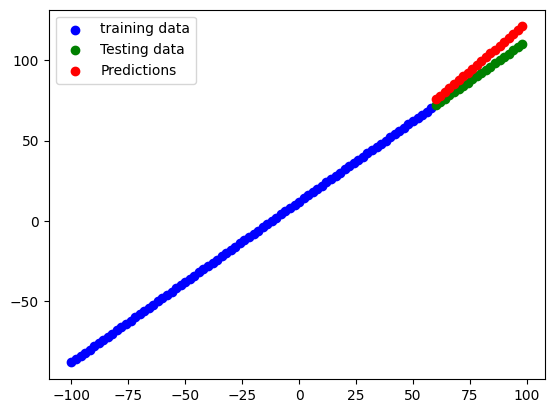

In [39]:
plot_data()

## Evaluating aour model's predictions with regression evaluation metrics

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 7.1954 - mean_absolute_error: 7.1954


[7.195408821105957, 7.195408821105957]

In [41]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110], dtype=int32)>

In [42]:
y_pred

array([[ 75.506454],
       [ 77.89258 ],
       [ 80.281136],
       [ 82.66968 ],
       [ 85.058235],
       [ 87.446785],
       [ 89.83534 ],
       [ 92.2239  ],
       [ 94.612465],
       [ 97.001015],
       [ 99.38956 ],
       [101.778114],
       [104.16667 ],
       [106.55522 ],
       [108.94378 ],
       [111.332344],
       [113.72089 ],
       [116.10944 ],
       [118.49801 ],
       [120.88655 ]], dtype=float32)

In [43]:
tf.metrics.mae(y_test,y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 3.5064545,  3.8925781,  4.2811356,  4.6696777,  5.058235 ,
        5.446785 ,  5.8353424,  6.2239   ,  6.612465 ,  7.0010147,
        7.389557 ,  7.7781143,  8.166672 ,  8.555222 ,  8.943779 ,
        9.332344 ,  9.720886 , 10.109444 , 10.498009 , 10.886551 ],
      dtype=float32)>

In [44]:
y_test.shape, tf.squeeze(y_pred).shape

(TensorShape([20]), TensorShape([20]))

In [45]:
mae=tf.cast(y_test,dtype=tf.float32) - tf.squeeze(y_pred)
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ -3.5064545,  -3.8925781,  -4.2811356,  -4.6696777,  -5.058235 ,
        -5.446785 ,  -5.8353424,  -6.2239   ,  -6.612465 ,  -7.0010147,
        -7.389557 ,  -7.7781143,  -8.166672 ,  -8.555222 ,  -8.943779 ,
        -9.332344 ,  -9.720886 , -10.109444 , -10.498009 , -10.886551 ],
      dtype=float32)>

In [46]:
mae=tf.abs(mae)
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 3.5064545,  3.8925781,  4.2811356,  4.6696777,  5.058235 ,
        5.446785 ,  5.8353424,  6.2239   ,  6.612465 ,  7.0010147,
        7.389557 ,  7.7781143,  8.166672 ,  8.555222 ,  8.943779 ,
        9.332344 ,  9.720886 , 10.109444 , 10.498009 , 10.886551 ],
      dtype=float32)>

In [47]:
tf.reduce_sum(mae)/X_test.shape[0]

<tf.Tensor: shape=(), dtype=float32, numpy=7.195409>

In [48]:
X_test.shape[0]

20

In [49]:
tf.size(X_test).numpy()

20

In [50]:
# mean absolure error
tf.metrics.mae(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=7.195409>

In [51]:
# mean square error
tf.metrics.mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=56.7929>

In [52]:
# uber
tf.metrics.huber(y_test, y_pred[:,0])

<tf.Tensor: shape=(), dtype=float32, numpy=6.695409>

In [53]:
y_pred[:,0]

array([ 75.506454,  77.89258 ,  80.281136,  82.66968 ,  85.058235,
        87.446785,  89.83534 ,  92.2239  ,  94.612465,  97.001015,
        99.38956 , 101.778114, 104.16667 , 106.55522 , 108.94378 ,
       111.332344, 113.72089 , 116.10944 , 118.49801 , 120.88655 ],
      dtype=float32)

In [54]:
# make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mae(y_true,tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mse(y_true,tf.squeeze(y_pred))

In [55]:
mae(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=7.195409>

##Runing experiments to improve our model

* Get the model more data to train
* Make the model more larger (more layers or more hidden units per each layer)
* Train for longer (more epochs)

In [56]:
# making model_1
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(X_train[:,tf.newaxis],y_train,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13.7999 - mae: 13.7999  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3519 - mae: 13.3519 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9708 - mae: 12.9708 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.9834 - mae: 12.9834 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9961 - mae: 12.9961 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.0088 - mae: 13.0088 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.0215 - mae: 13.0215 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.0341 - mae: 13.0341 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.0419 - mae: 13.0419  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8839 - mae: 12.8839 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.0616 - mae: 13.0616 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.8926 - mae: 12.8926  
Epoch 13/100
3/3 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


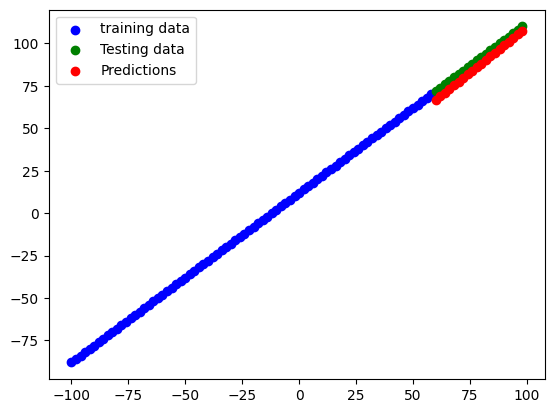

In [57]:
#make and plot predictions for model_1
y_pred_1=model_1.predict(X_test)
plot_data(predictions=y_pred_1)

In [58]:
y_pred_1.shape

(20, 1)

In [59]:
mae_1=mae(y_test,y_pred_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=3.9069333>

In [60]:
mse_1=mse(y_test,y_pred_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=16.004839>

In [61]:
# making model_2
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['mse'])
model_2.fit(X_train[:,tf.newaxis],y_train,epochs=57)

Epoch 1/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 50.8795 - mse: 3477.2280
Epoch 2/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.6648 - mse: 2441.1611 
Epoch 3/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.6988 - mse: 1610.6652 
Epoch 4/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.8077 - mse: 960.8964  
Epoch 5/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.0729 - mse: 489.3446 
Epoch 6/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0803 - mse: 203.9670 
Epoch 7/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1777 - mse: 111.1419
Epoch 8/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8566 - mse: 140.8989 
Epoch 9/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8192 - mse: 167.7632 
Epoch 10/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5360 - mse: 159.4529 
Epoch 11/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3950 - mse: 130.4034 
Epoch 12/57
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6892 - mse: 106.2213
Epoch 13/57
3/3 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
MAE:  tf.Tensor(5.902436, shape=(), dtype=float32)
MSE:  tf.Tensor(35.09365, shape=(), dtype=float32)


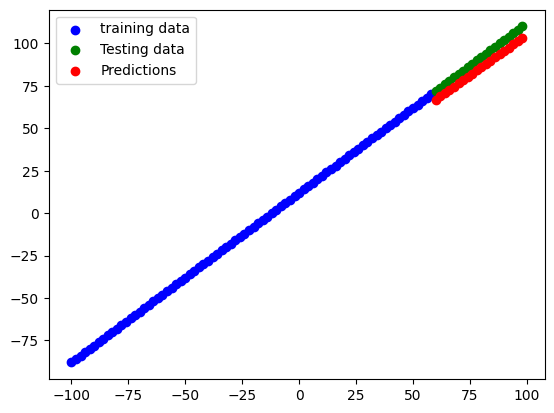

In [62]:
y_pred_2=model_2.predict(X_test)

mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
print('MAE: ', mae_2)
print('MSE: ' , mse_2)

plot_data(predictions=y_pred_2)

In [63]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [64]:
# making model_3
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['mse'])
model_3.fit(X_train[:,tf.newaxis],y_train,epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 20.3668 - mse: 558.2397
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3487 - mse: 181.9531 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3742 - mse: 115.6623
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8791 - mse: 141.1337 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.1272 - mse: 125.6996 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0826 - mse: 106.7677
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0332 - mse: 126.3669 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3958 - mse: 131.9099 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3407 - mse: 106.4851
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3288 - mse: 94.3281 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0780 - mse: 94.0638 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9824 - mse: 99.6609 
Epoch 13/500
3/3 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE:  tf.Tensor(0.69814265, shape=(), dtype=float32)
MSE:  tf.Tensor(0.49793863, shape=(), dtype=float32)


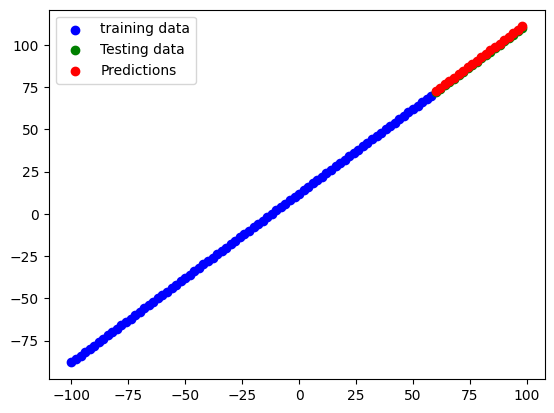

In [65]:
y_pred_3=model_3.predict(X_test)

mae_3=mae(y_test, y_pred_3)
mse_3= mse(y_test, y_pred_3)
print('MAE: ', mae_3)
print('MSE: ' ,mse_3)

plot_data(predictions=y_pred_3)

##Comparing the results of our experiments

In [66]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [67]:
import pandas as pd

In [68]:
model_results=[['model_1',mae_1.numpy(),mse_1.numpy()],
             ['model_2',mae_2.numpy(),mse_2.numpy()],
             ['model_3',mae_3.numpy(),mse_3.numpy()]]

model_results_df=pd.DataFrame(model_results,columns=['model','mae','mse'])
model_results_df

,model,mae,mse
0,model_1,3.906933,16.004839
1,model_2,5.902436,35.093651
2,model_3,0.698143,0.497939


In [69]:
mae_2.numpy()

5.902436

##Tracking our experiments

In [70]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [72]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

##Saving our models

reusing our models out of google colab
there are two main formats:
1. SavedModel format
2. HDF5 format

In [73]:
model_3.save('model_3_SavedModel.keras') # for using the model within tensorflow

In [74]:
model_3.save('model_3_HDF5.h5') #for using the model universally

##Loading in a saved model

In [75]:
loaded_model_3=tf.keras.models.load_model('/content/model_3_SavedModel.keras')

In [76]:
loaded_model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

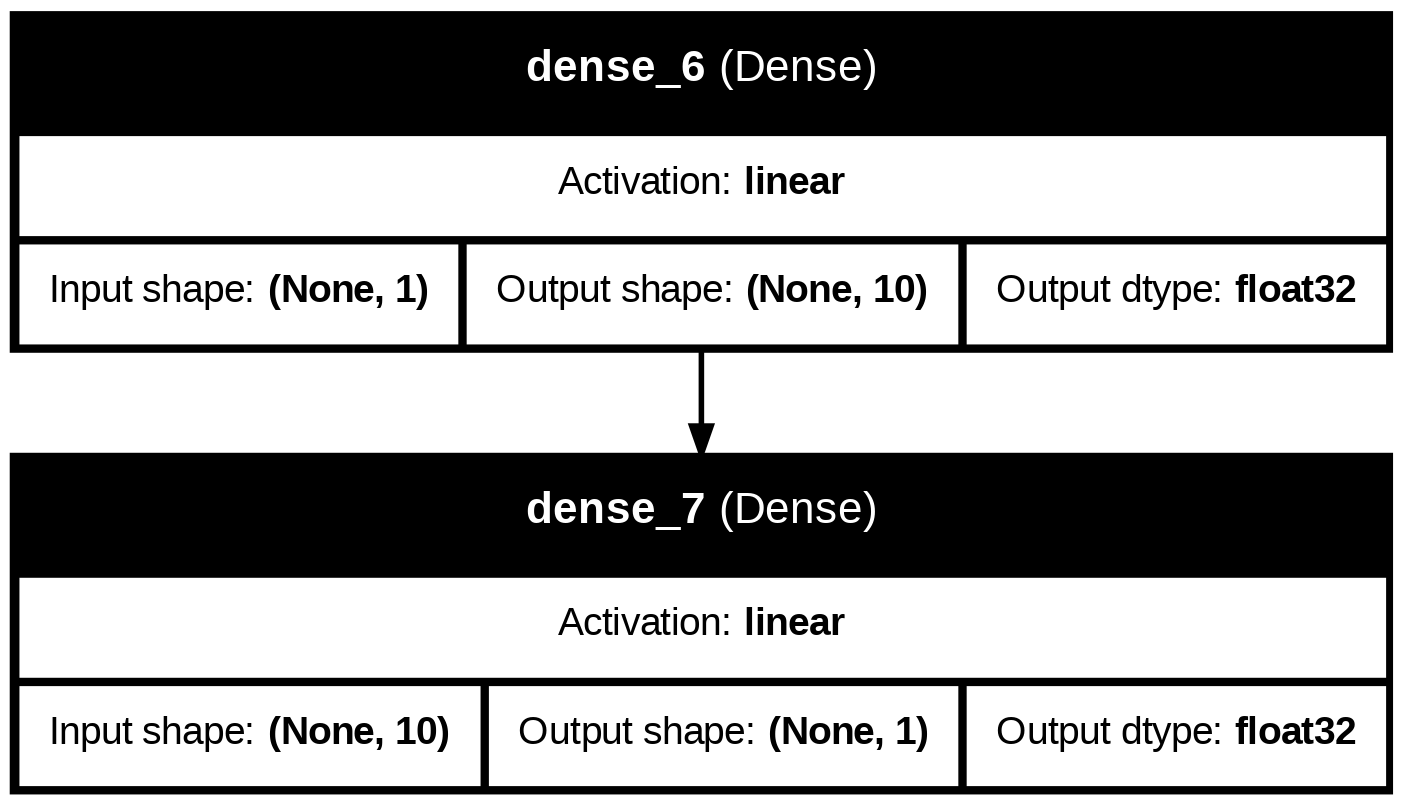

In [77]:
plot_model(loaded_model_3,show_dtype=True,show_layer_activations=True,show_layer_names=True,show_shapes=True)

In [78]:
model_3_pred= model_3.predict(X_test)
loaded_model_3_pred= loaded_model_3.predict(X_test)

model_3_pred==loaded_model_3_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [79]:
loaded_model_3_h5=tf.keras.models.load_model('/content/model_3_HDF5.h5')

In [80]:
loaded_model_3_h5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

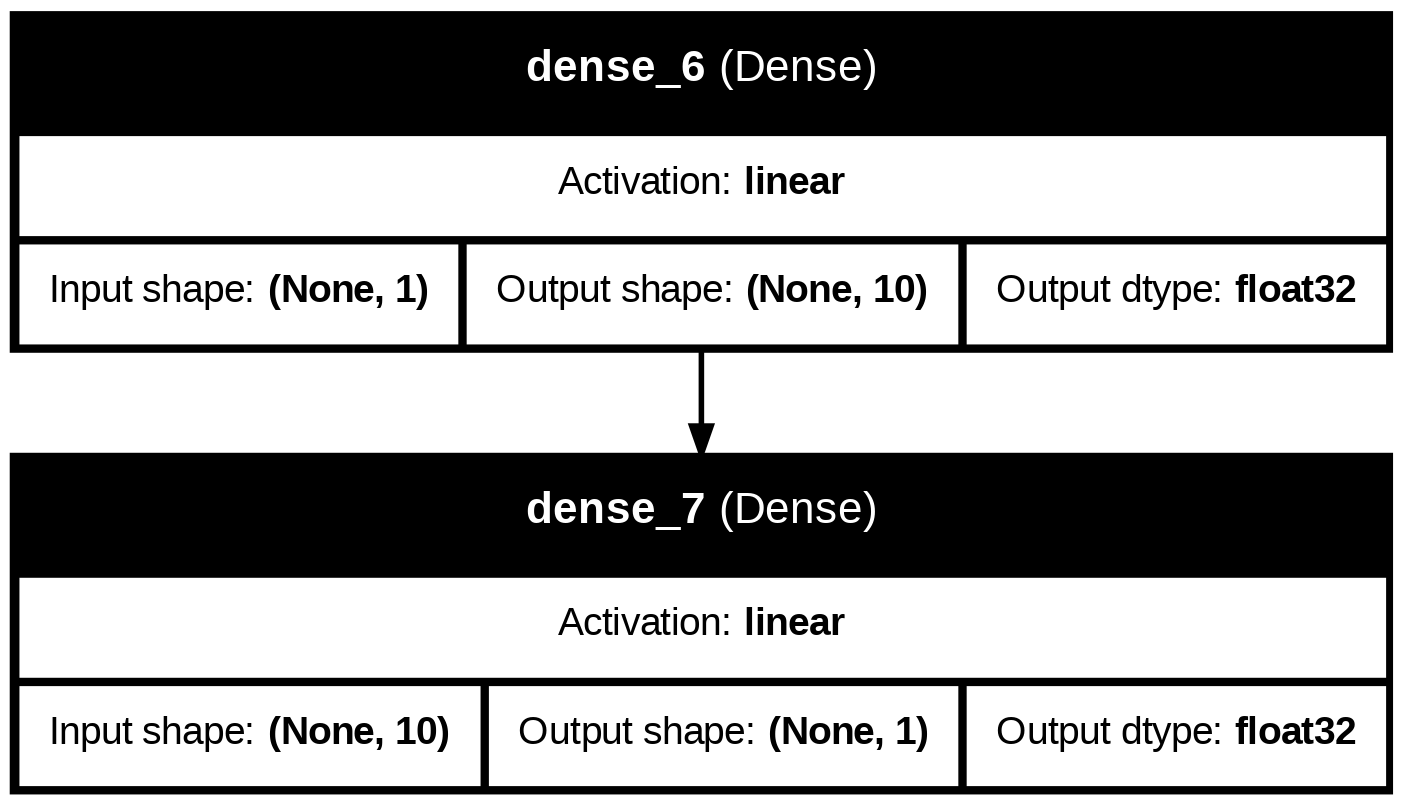

In [81]:
plot_model(loaded_model_3_h5,show_dtype=True,show_layer_activations=True,show_layer_names=True,show_shapes=True)

In [82]:
loaded_model_3_h5_pred= loaded_model_3_h5.predict(X_test)

model_3_pred==loaded_model_3_h5_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a file from Google Colab

In [83]:
from google.colab import files

In [84]:
files.download('model_3_SavedModel.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
#copy a file from google colam to google drive (this requiers mounting google drive)
!cp /content/model_3_SavedModel.keras  '/content/drive/MyDrive/Colab Notebooks/TensorFlow Developer Certificate in 2023: Zero to Mastery'

In [88]:
!ls '/content/drive/MyDrive/Colab Notebooks/TensorFlow Developer Certificate in 2023: Zero to Mastery'

01_tensorflow_foundementals.ipynb		     model_3_SavedModel.keras
02_neural_networks_regression_with_tensorflow.ipynb


##A larger example

In [87]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
insurance_one_hot=pd.get_dummies(insurance,dtype=int)
insurance_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
#create X and y
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']

In [99]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [100]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)

In [102]:
len(X_train), len(X_test  ),

(1070, 268)

In [132]:
#creating model
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10484.5469 - mae: 10484.5469
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7216.6572 - mae: 7216.6572
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6601.8848 - mae: 6601.8848
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6135.0439 - mae: 6135.0439
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5767.4453 - mae: 5767.4453
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5222.2202 - mae: 5222.2202
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4578.2554 - mae: 4578.2554
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3899.8706 - mae: 3899.8706
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3809.8306 - mae: 3809.8306
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3754.1399 - mae: 3754.1399
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3635.7913 - mae: 3635.7913
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [133]:
# evaluate the insurane model on the test set
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1930.9425 - mae: 1930.9425  


[1896.5751953125, 1896.5751953125]

In [134]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [170]:
#trying to improve by adding hidden layer
tf.random.set_seed(42)

insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.02),
    metrics=['mae']
)
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12717.4580 - mae: 12717.4580
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7538.6030 - mae: 7538.6030
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7234.1030 - mae: 7234.1030
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7023.9375 - mae: 7023.9375
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6736.6099 - mae: 6736.6099 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6390.8740 - mae: 6390.8740
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6211.4321 - mae: 6211.4321
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6064.3179 - mae: 6064.3179
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5851.4458 - mae: 5851.4458
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5590.6509 - mae: 5590.6509
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5210.9673 - mae: 5210.9673
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [173]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1785.9508 - mae: 1785.9508 


[1825.48046875, 1825.48046875]

In [174]:
#trying to improve by incresing epochs
tf.random.set_seed(42)

insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.02),
    metrics=['mae']
)
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12884.1543 - mae: 12884.1543
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7813.2930 - mae: 7813.2930 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7327.6475 - mae: 7327.6475
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7136.0669 - mae: 7136.0669
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6933.2520 - mae: 6933.2520 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6666.9453 - mae: 6666.9453 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6383.3257 - mae: 6383.3257 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6225.7358 - mae: 6225.7358 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6098.2524 - mae: 6098.2524 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5968.4819 - mae: 5968.4819
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5794.5659 - mae: 5794.5659
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [175]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1791.4321 - mae: 1791.4321  


[1784.4266357421875, 1784.4266357421875]

Text(0.5, 0, 'epochs')

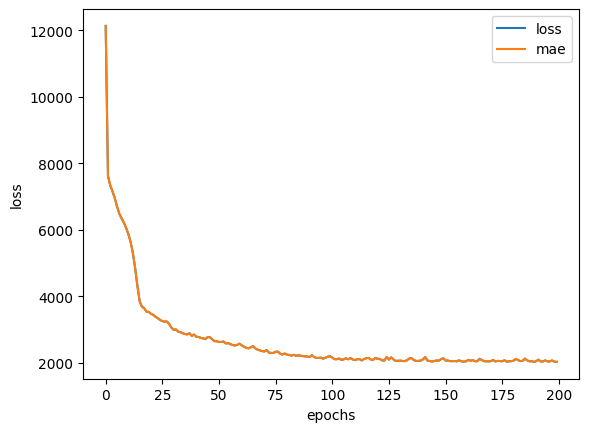

In [201]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

##Preprocessing(normalization or stanardization)

<Axes: ylabel='Frequency'>

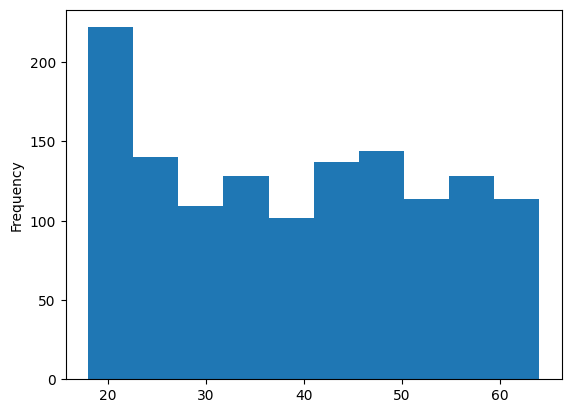

In [204]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

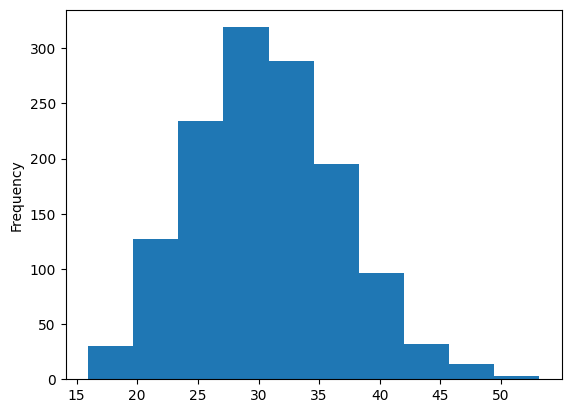

In [206]:
X['bmi'].plot(kind='hist')

<Axes: ylabel='Frequency'>

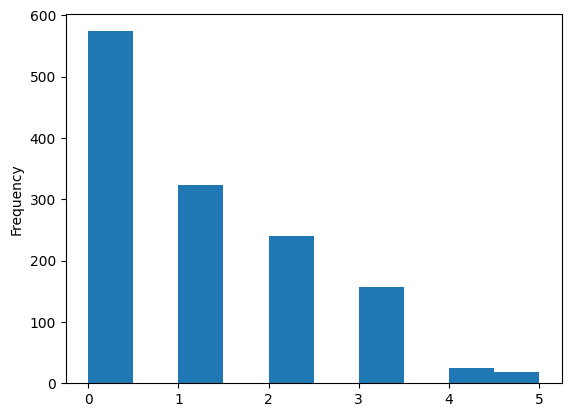

In [207]:
X['children'].plot(kind='hist')

In [209]:
X['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [214]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [216]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [217]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore',),['sex','smoker','region'])
)

# Create X and y
X=insurance.drop('charges',axis=1)
y=insurance['charges']

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [221]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [226]:
pd.DataFrame(X_train_normal,columns=['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes',
                                     'region_northeast','region_northwest','region_southeast','region_southwest'])

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [228]:
set(X_test['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [257]:
#trying to improve by training normalized and one-hot-encoded data
tf.random.set_seed(42)

insurance_model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.007),
    metrics=['mae']
)
insurance_model_4.fit(X_train_normal,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13291.3496 - mae: 13291.3496
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13113.8965 - mae: 13113.8965
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12132.7686 - mae: 12132.7686 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9858.7061 - mae: 9858.7061   
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8058.2217 - mae: 8058.2217
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7700.9077 - mae: 7700.9077
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7467.6182 - mae: 7467.6182
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7218.9019 - mae: 7218.9019
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6934.5068 - mae: 6934.5068
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6594.6958 - mae: 6594.6958
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6172.9224 - mae: 6172.9224
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [251]:
insurance_model_4.summary()

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_220 (Dense)                    │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)